In [1]:
library('magrittr')
library('tibble')
library('dplyr')
library('tidyr')
library('ggplot2')
library('RColorBrewer')
library('readr')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [2]:
conf_flow <- 
    read_tsv(
        'data.tsv',
        col_types=cols(
            `Sample:`=col_character(),
            `Donor`=col_factor(levels=c('Donor 48', 'Donor 49', 'Donor 50', 'Donor 51')),
            `Seed`=col_factor(levels=c('5.00E+06', '2.50E+06', '1.25E+06', '6.25E+05', '3.13E+05', '1.56E+05')),
            .default=col_double()
        )
    )

conf_flow %>% head

Sample:,Donor,Seed,Count,Live | Freq. of Parent,Live/CCR7+ CD45RO+ | Freq. of Parent,Live/CCR7+ CD45RO- | Freq. of Parent,Live/CCR7- CD45RO+ | Freq. of Parent,Live/CCR7- CD45RO- | Freq. of Parent
1.fcs,Donor 48,5.00E+06,1980000,70.8,75.8,6.99,9.08,8.17
2.fcs,Donor 48,2.50E+06,1510000,66.7,82.1,4.06,7.10,6.77
3.fcs,Donor 48,1.25E+06,1020000,71.6,88.0,2.51,4.87,4.65
4.fcs,Donor 48,6.25E+05,719000,77.1,89.8,2.26,4.02,3.91
5.fcs,Donor 48,3.13E+05,548000,77.9,86.5,5.04,4.39,4.07
6.fcs,Donor 48,1.56E+05,258662,83.5,89.5,3.68,3.08,3.71


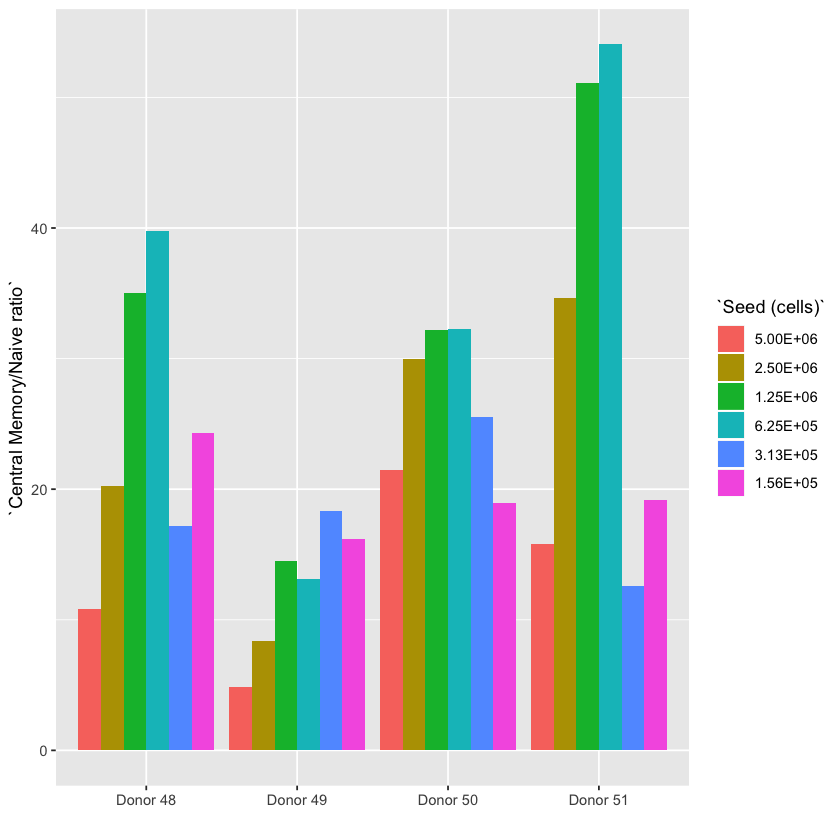

In [7]:
conf_flow %>%
    mutate(
        `CM` = `Live/CCR7+ CD45RO+ | Freq. of Parent`,
        `Naive` = `Live/CCR7+ CD45RO- | Freq. of Parent`,
        `Central Memory/Naive ratio` = `CM` / `Naive`,
        `Seed (cells)`=`Seed`
    ) %>%
    ggplot(aes(x=`Donor`, y=`Central Memory/Naive ratio`, fill=`Seed (cells)`)) +
        geom_col(pos="dodge") +
        xlab('')

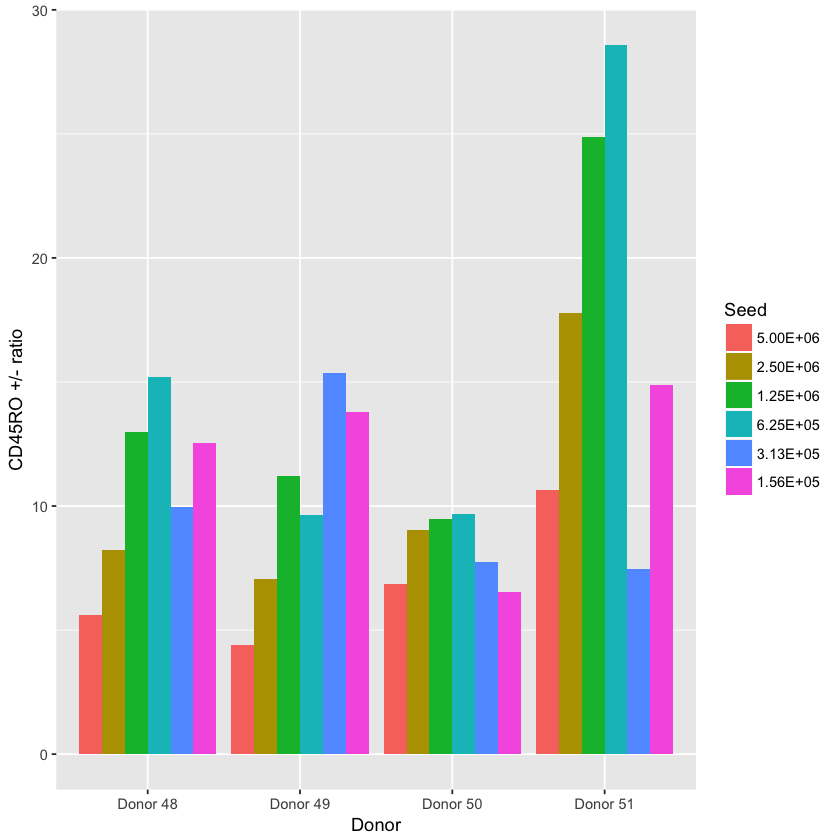

In [4]:
conf_flow %>%
    mutate(
        `CD45RO+` = `Live/CCR7+ CD45RO+ | Freq. of Parent` + `Live/CCR7- CD45RO+ | Freq. of Parent`,
        `CD45RO-` = `Live/CCR7+ CD45RO- | Freq. of Parent` + `Live/CCR7- CD45RO- | Freq. of Parent`,
        `CD45RO +/- ratio` = `CD45RO+` / `CD45RO-`
    ) %>%
    ggplot(aes(x=`Donor`, y=`CD45RO +/- ratio`, fill=`Seed`)) +
        geom_col(pos="dodge")